In [1]:
import pandas as pd
import numpy as np
import pickle

In [2]:
series = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

## 15min interval and 6 hour forecast

In [3]:
#number of shifts

series = series.resample("15Min").mean()
shiftno=24
yshiftno=24
df15min = pd.DataFrame()
for _ in range(shiftno):
    df15min = pd.concat([df15min,series.shift(periods=_)],axis=1)
#form y values
for _ in range(yshiftno):
    df15min=pd.concat([df15min,series.shift(periods=-1*_-1)],axis=1)

collist = []
for _ in range(int(len(df15min.iloc[:,series.shape[1]*shiftno:].columns)/2)):
    collist.extend(["realpower_15min_"+str(_), "reactivepower_15min_"+str(_)])
collist_input = []
for _ in range(int(len(df15min.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_15min_"+str(_), "reactivepowerin_15min_"+str(_)])
    
collist_input.extend(collist)
df15min.columns = collist_input

In [4]:
# dataset = df2.iloc[shiftno-1:df2.shape[0]-yshiftno]

## 1hr interval

In [5]:
#number of shifts
series = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("1H").mean()

shiftno=24
df24h = pd.DataFrame()
for _ in range(shiftno):
    df24h = pd.concat([df24h,series.shift(periods=_)],axis=1)

df24h = df24h.resample("15Min").ffill()

# collist = []
# for _ in range(int(len(df24h.iloc[:,series.shape[1]*shiftno:].columns)/2)):
#     collist.extend(["realpower_1day_"+str(_), "reactivepower_1day_"+str(_)])

collist_input = []
for _ in range(int(len(df24h.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_1Hr_"+str(_), "reactivepowerin_1Hr_"+str(_)])

# collist_input.extend(collist)
df24h.columns = collist_input

## 1 day interval

In [6]:
#number of shifts
series = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("24H").mean()

shiftno=7
df1w = pd.DataFrame()
for _ in range(shiftno):
    df1w = pd.concat([df1w,series.shift(periods=_)],axis=1)

df1w = df1w.resample("15Min").ffill()

collist_input = []
for _ in range(int(len(df1w.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_1D_"+str(_), "reactivepowerin_1D_"+str(_)])

# collist_input.extend(collist)
df1w.columns = collist_input

## 12 weeks interval

In [7]:
#number of shifts
series = pd.read_csv('ProcessedDataCenterHall.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = series.resample("1W").mean()

shiftno=12
df3mos = pd.DataFrame()
for _ in range(shiftno):
    df3mos = pd.concat([df3mos,series.shift(periods=_)],axis=1)

df3mos = df3mos.resample("15Min").ffill()

collist_input = []
for _ in range(int(len(df3mos.iloc[:,:series.shape[1]*shiftno].columns)/2)):
    collist_input.extend(["realpowerin_3Mos_"+str(_), "reactivepowerin_3Mos_"+str(_)])

# collist_input.extend(collist)
df3mos.columns = collist_input

In [8]:
dfall = pd.concat([df3mos,df1w,df24h,df15min],axis=1)

In [9]:
del df3mos,df1w,df24h,df15min # free up memory

In [10]:
dfall = dfall[~dfall.isnull().any(axis=1)]

In [14]:
list(dfall.iloc[:,:-24*2].columns)

['realpowerin_3Mos_0',
 'reactivepowerin_3Mos_0',
 'realpowerin_3Mos_1',
 'reactivepowerin_3Mos_1',
 'realpowerin_3Mos_2',
 'reactivepowerin_3Mos_2',
 'realpowerin_3Mos_3',
 'reactivepowerin_3Mos_3',
 'realpowerin_3Mos_4',
 'reactivepowerin_3Mos_4',
 'realpowerin_3Mos_5',
 'reactivepowerin_3Mos_5',
 'realpowerin_3Mos_6',
 'reactivepowerin_3Mos_6',
 'realpowerin_3Mos_7',
 'reactivepowerin_3Mos_7',
 'realpowerin_3Mos_8',
 'reactivepowerin_3Mos_8',
 'realpowerin_3Mos_9',
 'reactivepowerin_3Mos_9',
 'realpowerin_3Mos_10',
 'reactivepowerin_3Mos_10',
 'realpowerin_3Mos_11',
 'reactivepowerin_3Mos_11',
 'realpowerin_1D_0',
 'reactivepowerin_1D_0',
 'realpowerin_1D_1',
 'reactivepowerin_1D_1',
 'realpowerin_1D_2',
 'reactivepowerin_1D_2',
 'realpowerin_1D_3',
 'reactivepowerin_1D_3',
 'realpowerin_1D_4',
 'reactivepowerin_1D_4',
 'realpowerin_1D_5',
 'reactivepowerin_1D_5',
 'realpowerin_1D_6',
 'reactivepowerin_1D_6',
 'realpowerin_1Hr_0',
 'reactivepowerin_1Hr_0',
 'realpowerin_1Hr_1',
 're

In [15]:
from featurewiz import featurewiz

Imported DASK version = 0.0.60. Use nrows=1000 to sample 1000 rows from train to start.
output = featurewiz(dataname, target, corr_limit=0.70, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=True, nrows=None)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']
                                


Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
Loading train data...
    Shape of your Data Set loaded: (30000, 182)
Loading test data...
    No file given. Continuing...
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    134 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
No GPU active on this device
    Running XGBoost using CPU parameters
Turning off Target encoding for multi-label problems like this data set...
Removing 0 columns from further processing since ID or low information variables
    columns removed: []
    After removing redundant variables from further processing, features left = 134
#### Multi_Label Regression Feature Selection Started ####
Searching for highly correlated variables from 134 variables using SULOV method
#####  SULOV : Searching for Un

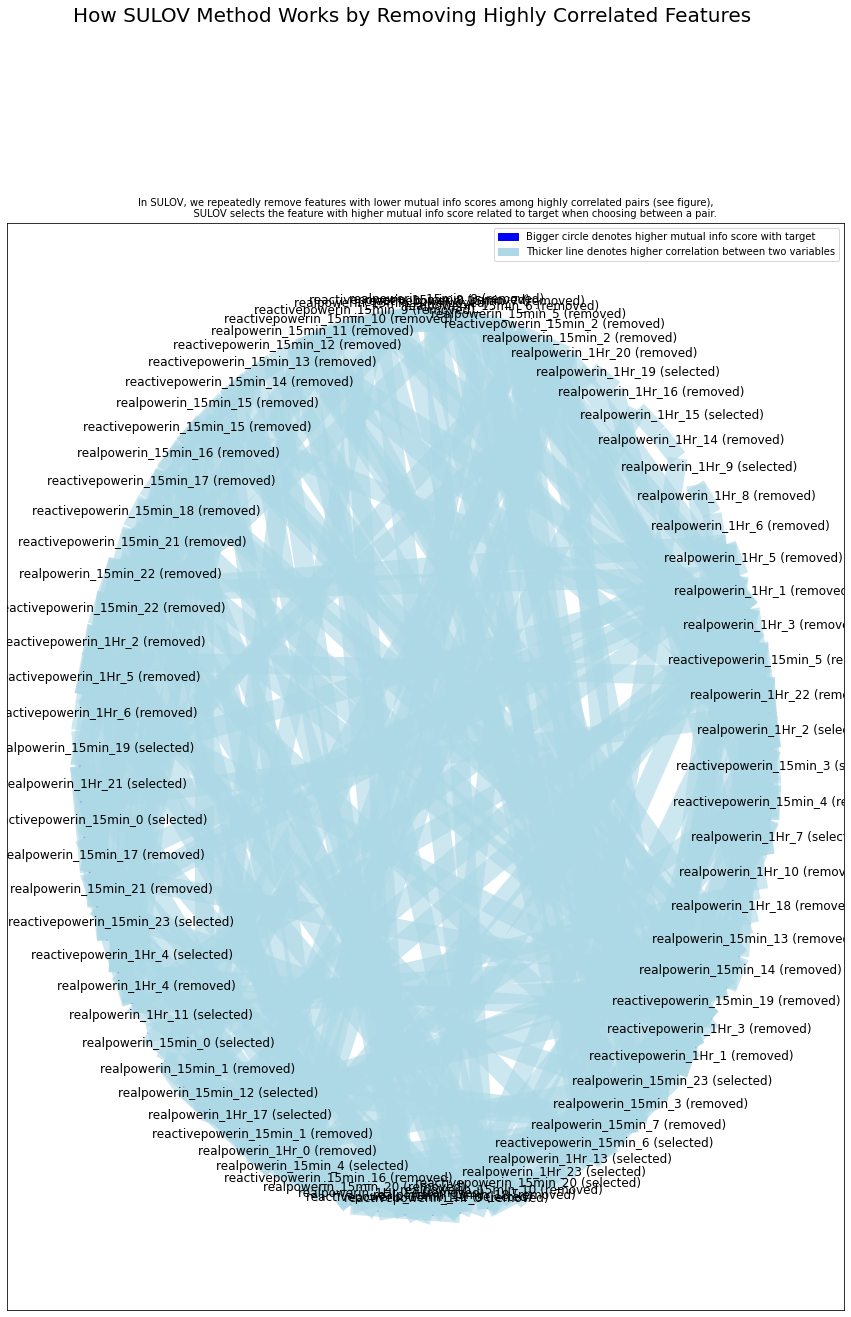

    Adding 0 categorical variables to reduced numeric variables  of 77
############## F E A T U R E   S E L E C T I O N  ####################
Current number of predictors = 77 
    Finding Important Features using Boosted Trees algorithm...
        using 77 variables...
        using 62 variables...
        using 47 variables...
        using 32 variables...
        using 17 variables...
        using 2 variables...
Selected 22 important features:
['realpowerin_15min_0', 'reactivepowerin_15min_0', 'realpowerin_1D_0', 'reactivepowerin_1Hr_20', 'realpowerin_1Hr_19', 'realpowerin_1Hr_21', 'reactivepowerin_1Hr_21', 'realpowerin_1Hr_11', 'reactivepowerin_1D_0', 'reactivepowerin_1Hr_22', 'reactivepowerin_1Hr_18', 'reactivepowerin_1Hr_19', 'realpowerin_1Hr_13', 'realpowerin_1Hr_23', 'realpowerin_15min_4', 'realpowerin_1Hr_9', 'realpowerin_1Hr_17', 'realpowerin_1Hr_7', 'reactivepowerin_15min_3', 'realpowerin_1Hr_15', 'realpowerin_15min_12', 'realpowerin_1Hr_2']
    Time taken = 944 seconds
Ret

In [20]:
outputs = featurewiz(dfall.sample(n=30000, random_state=2022), list(dfall.iloc[:,-24*2:].columns), nrows=30001, corr_limit=0.95, verbose=1, dask_xgboost_flag=False)

In [ ]:
def backup(object, filename):
    with open(filename, 'wb') as f:
        pickle.dump(object, f, pickle.HIGHEST_PROTOCOL)

def reload(persist):
    with open(persist, 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
    return data

In [ ]:
backup(outputs,"outputs_feature_select.pickle")